In [44]:
import networkx as nx
from matplotlib import pyplot as plt
from itertools import combinations
from functools import wraps
import time

In [45]:
def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        print(f"{func.__name__} took {end - start:.6f} seconds")
        return result
    return wrapper

In [46]:
@timeit
def brute_force(G, terminals):
    best_tree = None
    best_weight = float('inf')

    all_nodes = set(G)
    non_terminals = all_nodes - set(terminals)

    for r in range(len(non_terminals) + 1):
        for subset in combinations(non_terminals, r):
            nodes = set(terminals) | set(subset)
            subgraph = G.subgraph(nodes)

            if nx.is_connected(subgraph):
                T = nx.minimum_spanning_tree(subgraph, weight='weight')
                w = T.size(weight = 'weight')
                if w < best_weight:
                    best_weight = w
                    best_tree = T

    return best_tree, best_weight

In [47]:
K5 = nx.Graph()
edgesK5 = [
    (0, 1, 28), (0, 2, 13), (0, 3, 13), (0, 4, 22),
    (1, 2, 27), (1, 3, 28), (1, 4, 13),
    (2, 3, 19), (2, 4, 14),
    (3, 4, 19)
]
K5.add_weighted_edges_from(edgesK5)

In [48]:
K5best = nx.Graph()
edgesK5best = [
    (0, 1, 18), (0, 2, 20), (0, 3, 22), (0, 5, 10), (0, 6, 32), (0, 7, 29),
    (1, 2, 12), (1, 3, 18), (1, 4, 20), (1, 5, 29), (1, 6, 36), (1, 7, 10),
    (2, 3, 40), (2, 4, 20), (2, 5, 22), (2, 6, 21), (2, 7, 23),
    (3, 4, 22), (3, 5, 22), (3, 6, 40), (3, 7, 22),
    (4, 5, 23), (4, 6, 32), (4, 7, 20),
    (5, 6, 21), (5, 7, 33),
    (6, 7, 11)
]
K5best.add_weighted_edges_from(edgesK5best)

In [49]:
CS4234_2 = nx.Graph()
edgesCS4234_2 = [
    (0, 1, 14), (0, 3, 14), (0, 6, 8),
    (1, 2, 14), (1, 6, 14),
    (2, 3, 14), (2, 4, 10), (2, 5, 8),
    (3, 5, 8),
    (4, 2, 10),
    (5, 6, 6),
    (6, 0, 8)
]
CS4234_2.add_weighted_edges_from(edgesCS4234_2)

brute_force took 0.001675 seconds


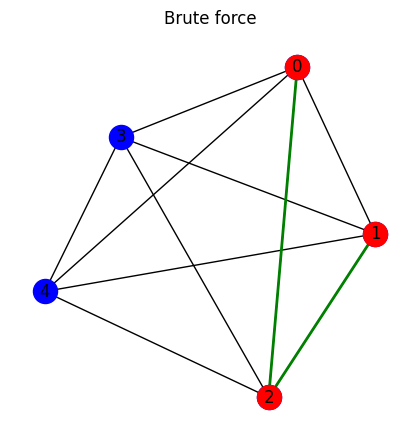

brute_force took 0.006074 seconds


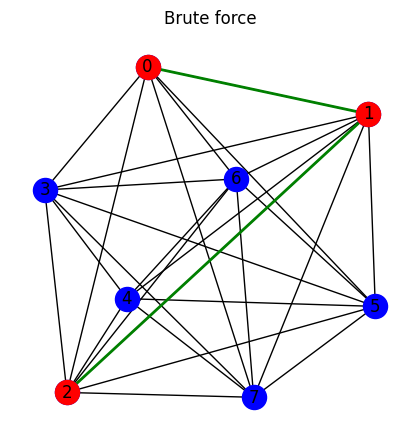

brute_force took 0.002385 seconds


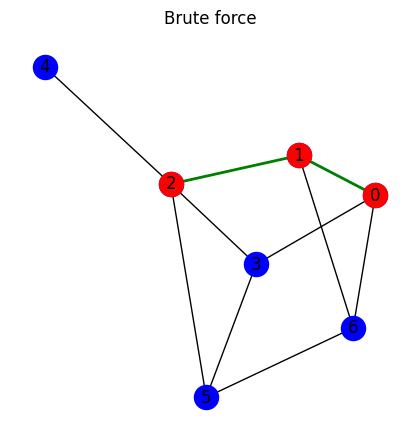

In [50]:
GS = [K5, K5best, CS4234_2]
terminals = [0,1,2]
for G in GS:
    pos = nx.spring_layout(G, seed=42)
    T, w = brute_force(G, terminals)
    plt.figure(figsize=(4,4))
    nx.draw(G, pos, with_labels = True, node_color = 'blue')
    nx.draw_networkx_edges(T, pos, edge_color = 'green', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist = terminals, node_color = 'red')
    plt.title("Brute force")
    plt.show()